# **TellCo Customer Analysis**
**by Fumbani Banda**

**Dataset Overview**

[A link to Dataset](https://raw.githubusercontent.com/deadex-ng/UserAnalyticsTelecom/main/data/Week1_data.csv)

**Research Questions**
1. Identifying the top 10 handsets used by the customers.
2. Identify the top 3 handset manufacturers
3. Identify the top 5 handsets per top 3 handset manufacturer
4. Make a short interpretation and recommendation to marketing teams




#**Data Wrangling**

**Libraries**

In [5]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer

**Gather**

In [6]:
data_url = 'https://raw.githubusercontent.com/deadex-ng/UserAnalyticsTelecom/main/data/Week1_data.csv'
df = pd.read_csv(data_url)
df.head(5)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [7]:
#remove spaces in column names
df.columns = df.columns.str.replace(' ','_')
df.columns.tolist()

['Bearer_Id',
 'Start',
 'Start_ms',
 'End',
 'End_ms',
 'Dur._(ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last_Location_Name',
 'Avg_RTT_DL_(ms)',
 'Avg_RTT_UL_(ms)',
 'Avg_Bearer_TP_DL_(kbps)',
 'Avg_Bearer_TP_UL_(kbps)',
 'TCP_DL_Retrans._Vol_(Bytes)',
 'TCP_UL_Retrans._Vol_(Bytes)',
 'DL_TP_<_50_Kbps_(%)',
 '50_Kbps_<_DL_TP_<_250_Kbps_(%)',
 '250_Kbps_<_DL_TP_<_1_Mbps_(%)',
 'DL_TP_>_1_Mbps_(%)',
 'UL_TP_<_10_Kbps_(%)',
 '10_Kbps_<_UL_TP_<_50_Kbps_(%)',
 '50_Kbps_<_UL_TP_<_300_Kbps_(%)',
 'UL_TP_>_300_Kbps_(%)',
 'HTTP_DL_(Bytes)',
 'HTTP_UL_(Bytes)',
 'Activity_Duration_DL_(ms)',
 'Activity_Duration_UL_(ms)',
 'Dur._(ms).1',
 'Handset_Manufacturer',
 'Handset_Type',
 'Nb_of_sec_with_125000B_<_Vol_DL',
 'Nb_of_sec_with_1250B_<_Vol_UL_<_6250B',
 'Nb_of_sec_with_31250B_<_Vol_DL_<_125000B',
 'Nb_of_sec_with_37500B_<_Vol_UL',
 'Nb_of_sec_with_6250B_<_Vol_DL_<_31250B',
 'Nb_of_sec_with_6250B_<_Vol_UL_<_37500B',
 'Nb_of_sec_with_Vol_DL_<_6250B',
 'Nb_of_sec_with_Vol_UL_<_1250B',
 'Socia

In [8]:
# number of data points
print(f" There are {df.shape[0]} rows and {df.shape[1]} columns")

 There are 150001 rows and 55 columns


**Unnecessary data**

In [9]:
#drop unnecessary columns
df.drop(columns=['Avg_RTT_DL_(ms)','Avg_RTT_UL_(ms)','Avg_Bearer_TP_DL_(kbps)',
                          'Avg_Bearer_TP_UL_(kbps)','TCP_DL_Retrans._Vol_(Bytes)',
                          'TCP_UL_Retrans._Vol_(Bytes)','DL_TP_<_50_Kbps_(%)','50_Kbps_<_DL_TP_<_250_Kbps_(%)',
                          '250_Kbps_<_DL_TP_<_1_Mbps_(%)','DL_TP_>_1_Mbps_(%)',
                          'UL_TP_<_10_Kbps_(%)','10_Kbps_<_UL_TP_<_50_Kbps_(%)',
                          '50_Kbps_<_UL_TP_<_300_Kbps_(%)','UL_TP_>_300_Kbps_(%)'
                          ,'HTTP_DL_(Bytes)','HTTP_UL_(Bytes)','Nb_of_sec_with_125000B_<_Vol_DL',
                 'Nb_of_sec_with_1250B_<_Vol_UL_<_6250B','Nb_of_sec_with_31250B_<_Vol_DL_<_125000B',
                 'Nb_of_sec_with_37500B_<_Vol_UL','Nb_of_sec_with_6250B_<_Vol_DL_<_31250B',
                 'Nb_of_sec_with_6250B_<_Vol_UL_<_37500B','Nb_of_sec_with_Vol_DL_<_6250B',
                 'Nb_of_sec_with_Vol_UL_<_1250B'],axis=1,inplace=True)

**Task 1.2**

Relevant Variables and their data types 

In [10]:
df.dtypes

Bearer_Id                    float64
Start                         object
Start_ms                     float64
End                           object
End_ms                       float64
Dur._(ms)                    float64
IMSI                         float64
MSISDN/Number                float64
IMEI                         float64
Last_Location_Name            object
Activity_Duration_DL_(ms)    float64
Activity_Duration_UL_(ms)    float64
Dur._(ms).1                  float64
Handset_Manufacturer          object
Handset_Type                  object
Social_Media_DL_(Bytes)      float64
Social_Media_UL_(Bytes)      float64
Google_DL_(Bytes)            float64
Google_UL_(Bytes)            float64
Email_DL_(Bytes)             float64
Email_UL_(Bytes)             float64
Youtube_DL_(Bytes)           float64
Youtube_UL_(Bytes)           float64
Netflix_DL_(Bytes)           float64
Netflix_UL_(Bytes)           float64
Gaming_DL_(Bytes)            float64
Gaming_UL_(Bytes)            float64
O

In [11]:
def drop_cols(df):
    #drop columns that have missing values of more than 30%
    threshold = 0.3
    data = df[df.columns[df.isnull().mean()<threshold]]

    return data

df = drop_cols(df)
df.shape

(150001, 31)

In [12]:
df.isna().sum()

Bearer_Id                     991
Start                           1
Start_ms                        1
End                             1
End_ms                          1
Dur._(ms)                       1
IMSI                          570
MSISDN/Number                1066
IMEI                          572
Last_Location_Name           1153
Activity_Duration_DL_(ms)       1
Activity_Duration_UL_(ms)       1
Dur._(ms).1                     1
Handset_Manufacturer          572
Handset_Type                  572
Social_Media_DL_(Bytes)         0
Social_Media_UL_(Bytes)         0
Google_DL_(Bytes)               0
Google_UL_(Bytes)               0
Email_DL_(Bytes)                0
Email_UL_(Bytes)                0
Youtube_DL_(Bytes)              0
Youtube_UL_(Bytes)              0
Netflix_DL_(Bytes)              0
Netflix_UL_(Bytes)              0
Gaming_DL_(Bytes)               0
Gaming_UL_(Bytes)               0
Other_DL_(Bytes)                0
Other_UL_(Bytes)                0
Total_UL_(Byte

In [13]:
def fix_missing_ffill(df, col):
    df[col] = df[col].fillna(method='ffill')
    return df[col]

#fix all missing values using ffill
df.ffill(axis=0)
df['Start'] = fix_missing_ffill(df, 'Start')
df['Start_ms'] = fix_missing_ffill(df, 'Start_ms')
df['End'] = fix_missing_ffill(df, 'End')
df['End_ms'] = fix_missing_ffill(df, 'End_ms')
df['Dur._(ms)'] = fix_missing_ffill(df, 'Dur._(ms)')
df['IMSI'] = fix_missing_ffill(df, 'IMSI')
df['MSISDN/Number'] = fix_missing_ffill(df, 'MSISDN/Number')
df['IMEI'] = fix_missing_ffill(df, 'IMEI')
df['Last_Location_Name'] = fix_missing_ffill(df, 'Last_Location_Name')
df['Activity_Duration_DL_(ms)'] = fix_missing_ffill(df, 'Activity_Duration_DL_(ms)')
df['Activity_Duration_UL_(ms)'] = fix_missing_ffill(df, 'Activity_Duration_UL_(ms)')
df['Dur._(ms).1'] = fix_missing_ffill(df, 'Dur._(ms).1')
df['Handset_Manufacturer'] = fix_missing_ffill(df, 'Handset_Manufacturer')
df['Handset_Type'] = fix_missing_ffill(df, 'Handset_Type')
df['Bearer_Id'] = fix_missing_ffill(df, 'Bearer_Id')
df['Total_UL_(Bytes)'] = fix_missing_ffill(df, 'Total_UL_(Bytes)')
df['Total_DL_(Bytes)'] = fix_missing_ffill(df, 'Total_DL_(Bytes)')


In [14]:
#all missing values have been fixed 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Bearer_Id                  150001 non-null  float64
 1   Start                      150001 non-null  object 
 2   Start_ms                   150001 non-null  float64
 3   End                        150001 non-null  object 
 4   End_ms                     150001 non-null  float64
 5   Dur._(ms)                  150001 non-null  float64
 6   IMSI                       150001 non-null  float64
 7   MSISDN/Number              150001 non-null  float64
 8   IMEI                       150001 non-null  float64
 9   Last_Location_Name         150001 non-null  object 
 10  Activity_Duration_DL_(ms)  150001 non-null  float64
 11  Activity_Duration_UL_(ms)  150001 non-null  float64
 12  Dur._(ms).1                150001 non-null  float64
 13  Handset_Manufacturer       15

**Working with date and time**

In [45]:
def find_agg(df:pd.DataFrame, agg_column:str, agg_metric:str, col_name:str, top:int, order=False )->pd.DataFrame:
  new_df = df.groupby(agg_column)[agg_column].agg(agg_metric).reset_index(name=col_name).\
  sort_values(by=col_name, ascending=order)[:top]
  
  return new_df

number_of_xDRsessions =find_agg(df,'MSISDN/Number','count','number of xDR sessions per user',10)
number_of_xDRsessions

,MSISDN/Number,number of xDR sessions per user
13526,3.362632e+10,18
6437,3.361489e+10,17
13180,3.362578e+10,17
37052,3.365973e+10,16
76363,3.367588e+10,15
92923,3.376054e+10,15
65118,3.366716e+10,13
13994,3.362708e+10,12
1279,3.360452e+10,12
106137,3.378632e+10,12


In [42]:
def plot_bar(df:pd.DataFrame, column:str, x:int) -> None:
    plt.figure(figsize=(8,5))
    p = sns.countplot(data=df, x=column, order=df[column].value_counts().iloc[:x].index)
    plt.setp(p.get_xticklabels(),rotation=90)
    plt.title(f'Top {x} Distribution of {column}', size=20, fontweight='bold')
    plt.show()


def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str) -> None:
    title =f'{x_col} data volume vs {y_col} data volume'
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    plt.figure(figsize=(10, 5))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=5, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def normalizer(df):
    norm = Normalizer()
    # normalize the exponential data with boxcox
    normalized_data = norm.fit_transform(df)

    # plot both together to compare
    fig, ax=plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(df, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(normalized_data[0], ax=ax[1])
    ax[1].set_title("Normalized data")


**Total Data Volume**


Total data volume for app = Total DL for app + Total UL fo app

In [17]:
df_copy = df.copy()

df_copy['social_media_data_volume'] =df_copy["Social_Media_UL_(Bytes)"] + df_copy["Social_Media_DL_(Bytes)"]
df_copy['google_data_volume'] = df_copy["Google_DL_(Bytes)"] + df_copy["Google_UL_(Bytes)"]
df_copy['email_data_volume'] = df_copy["Email_DL_(Bytes)"] + df_copy["Email_UL_(Bytes)"]
df_copy['youtube_data_volume'] = df_copy["Youtube_DL_(Bytes)"] + df_copy["Youtube_UL_(Bytes)"]
df_copy['netflix_data_volume'] = df_copy["Netflix_DL_(Bytes)"] + df_copy["Netflix_UL_(Bytes)"]
df_copy['gaming_data_volume'] = df_copy["Gaming_DL_(Bytes)"] + df_copy["Gaming_UL_(Bytes)"]
df_copy['other_data_volume'] = df_copy["Other_DL_(Bytes)"] + df_copy["Other_UL_(Bytes)"]
df_copy['total_data_volume'] = df_copy["Total_DL_(Bytes)"] + df_copy["Total_UL_(Bytes)"]
df_copy.drop(columns=["Social_Media_UL_(Bytes)","Social_Media_DL_(Bytes)","Google_DL_(Bytes)",
                       "Google_UL_(Bytes)","Email_DL_(Bytes)","Email_UL_(Bytes)","Youtube_DL_(Bytes)",
                       "Youtube_UL_(Bytes)","Netflix_DL_(Bytes)","Netflix_UL_(Bytes)","Gaming_DL_(Bytes)",
                       "Gaming_UL_(Bytes)","Other_DL_(Bytes)","Other_UL_(Bytes)","Total_DL_(Bytes)","Total_UL_(Bytes)"],inplace=True)


In [18]:
df2 = df_copy.copy()
df2.melt(id_vars=['Bearer_Id', 
'Start',                           
'Start_ms',                        
'End',                             
'End_ms',                          
'Dur._(ms)',                       
'IMSI',                          
'MSISDN/Number',                
'IMEI',                          
'Last_Location_Name',           
'Activity_Duration_DL_(ms)',       
'Activity_Duration_UL_(ms)',       
'Dur._(ms).1',                     
'Handset_Manufacturer',          
'Handset_Type'],var_name='app')
df2.head(2)

,Bearer_Id,Start,Start_ms,End,End_ms,Dur._(ms),IMSI,MSISDN/Number,IMEI,Last_Location_Name,Activity_Duration_DL_(ms),Activity_Duration_UL_(ms),Dur._(ms).1,Handset_Manufacturer,Handset_Type,social_media_data_volume,google_data_volume,email_data_volume,youtube_data_volume,netflix_data_volume,gaming_data_volume,other_data_volume,total_data_volume
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,1570185.0,2905912.0,3701304.0,18355943.0,17855187.0,292426453.0,180558843.0,345629377.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),1933278.0,4414096.0,937385.0,39359124.0,35565545.0,609920783.0,541959383.0,707185356.0


**Non Graphical Uni-variate Analysis**

The basic metrics (mean,mode,median,range) help to show the deviation from the norm 

In [19]:
df.columns.tolist()

['Bearer_Id',
 'Start',
 'Start_ms',
 'End',
 'End_ms',
 'Dur._(ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last_Location_Name',
 'Activity_Duration_DL_(ms)',
 'Activity_Duration_UL_(ms)',
 'Dur._(ms).1',
 'Handset_Manufacturer',
 'Handset_Type',
 'Social_Media_DL_(Bytes)',
 'Social_Media_UL_(Bytes)',
 'Google_DL_(Bytes)',
 'Google_UL_(Bytes)',
 'Email_DL_(Bytes)',
 'Email_UL_(Bytes)',
 'Youtube_DL_(Bytes)',
 'Youtube_UL_(Bytes)',
 'Netflix_DL_(Bytes)',
 'Netflix_UL_(Bytes)',
 'Gaming_DL_(Bytes)',
 'Gaming_UL_(Bytes)',
 'Other_DL_(Bytes)',
 'Other_UL_(Bytes)',
 'Total_UL_(Bytes)',
 'Total_DL_(Bytes)']

Dsplay basic statistics 

In [20]:
perc = [.20,.40,.60,.80]
include = ['object','float','int']
df_copy[['social_media_data_volume','google_data_volume','email_data_volume','youtube_data_volume',
         'netflix_data_volume','gaming_data_volume','total_data_volume','other_data_volume','Dur._(ms)']].\
         describe(percentiles = perc, include=include).transpose()

,count,mean,std,min,20%,40%,50%,60%,80%,max
social_media_data_volume,150001.0,1.828250e+06,1.035646e+06,1563.0,749751.0,1467798.0,1826471.0,2187144.0,2907617.0,3650861.0
google_data_volume,150001.0,7.807295e+06,3.516420e+06,40330.0,4358230.0,6661456.0,7812835.0,8984931.0,11240158.0,15528782.0
email_data_volume,150001.0,2.259102e+06,1.071109e+06,8359.0,1179783.0,1900110.0,2263567.0,2622407.0,3336817.0,4518036.0
youtube_data_volume,150001.0,2.264348e+07,9.246800e+06,78903.0,14301973.0,20244631.0,22661770.0,25074727.0,30939540.0,45190078.0
netflix_data_volume,150001.0,2.262861e+07,9.260820e+06,98432.0,14303192.0,20214807.0,22635545.0,25039096.0,30963806.0,45198153.0
gaming_data_volume,150001.0,4.303331e+08,2.440199e+08,306358.0,175865475.0,345490954.0,431614977.0,515105553.0,684394640.0,859202784.0
total_data_volume,150001.0,4.957640e+08,2.443811e+08,28956107.0,241628852.0,411254503.0,496860994.0,580526517.0,749377936.0,955984776.0
other_data_volume,150001.0,4.293653e+08,2.432681e+08,149045.0,176509996.0,345061745.0,429986492.0,513335372.0,682362847.0,859520934.0
Dur._(ms),150001.0,1.046085e+05,8.103735e+04,7142.0,45960.0,86399.0,86399.0,92515.0,148355.0,1859336.0


Display Quartiles

In [21]:
df_copy[['social_media_data_volume','google_data_volume','email_data_volume','youtube_data_volume',
         'netflix_data_volume','gaming_data_volume','total_data_volume','other_data_volume','Dur._(ms)']].quantile([0.25,0.5,0.75])

,social_media_data_volume,google_data_volume,email_data_volume,youtube_data_volume,netflix_data_volume,gaming_data_volume,total_data_volume,other_data_volume,Dur._(ms)
0.25,932218.0,4943599.0,1359344.0,15998463.0,15979455.0,218727939.0,284476442.0,218553417.0,57442.0
0.50,1826471.0,7812835.0,2263567.0,22661770.0,22635545.0,431614977.0,496860994.0,429986492.0,86399.0
0.75,2727487.0,10682796.0,3159818.0,29292604.0,29290445.0,641415878.0,706505411.0,639927495.0,132430.0


In [ ]:
df_copy.social_media_data_volume.describe()

In [ ]:
df_copy.social_media_data_volume.skew()

In [ ]:
df_copy.social_media_data_volume.kurtosis()

Google

In [ ]:
df_copy.google_data_volume.describe()


In [ ]:
df_copy.google_data_volume.skew()

In [ ]:
df_copy.google_data_volume.kurtosis()

Email

In [ ]:
df_copy.email_data_volume.describe()

In [ ]:
df_copy.email_data_volume.skew()

In [ ]:
df_copy.email_data_volume.kurtosis()

Youtube

In [ ]:
df_copy.youtube_data_volume.describe()

In [ ]:
df_copy.youtube_data_volume.skew()

In [ ]:
df_copy.youtube_data_volume.kurtosis()

Netflix

In [ ]:
df_copy.netflix_data_volume.describe()

In [ ]:
df_copy.netflix_data_volume.skew()

In [ ]:
df_copy.netflix_data_volume.kurtosis()

Gaming

In [ ]:
df_copy.gaming_data_volume.describe()

In [ ]:
df_copy.gaming_data_volume.skew()

In [ ]:
df_copy.gaming_data_volume.kurtosis()

Total data

In [ ]:
df_copy.total_data_volume.describe()

In [ ]:
df_copy.total_data_volume.skew()

In [ ]:
df_copy.total_data_volume.kurtosis()

Other data

In [ ]:
df_copy.other_data_volume.describe()

In [ ]:
df_copy.other_data_volume.skew()

In [ ]:
df_copy.other_data_volume.kurtosis()

**Graphical Uni-variate Analysis**

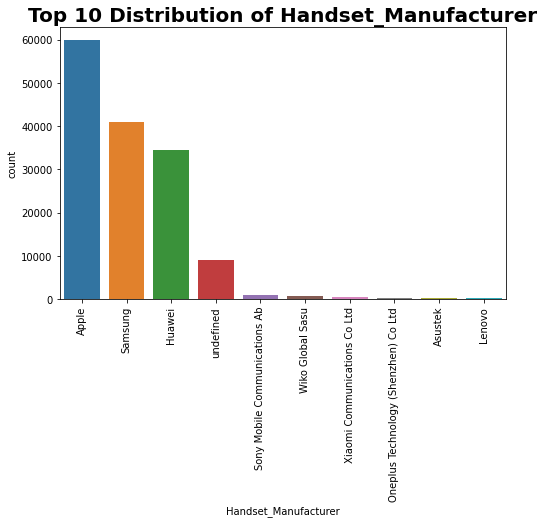

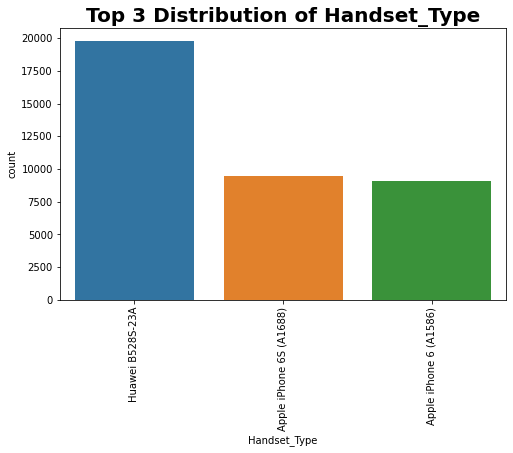

In [22]:
plot_bar(df,'Handset_Manufacturer',10)
plot_bar(df,'Handset_Type',3)


<Figure size 720x360 with 0 Axes>

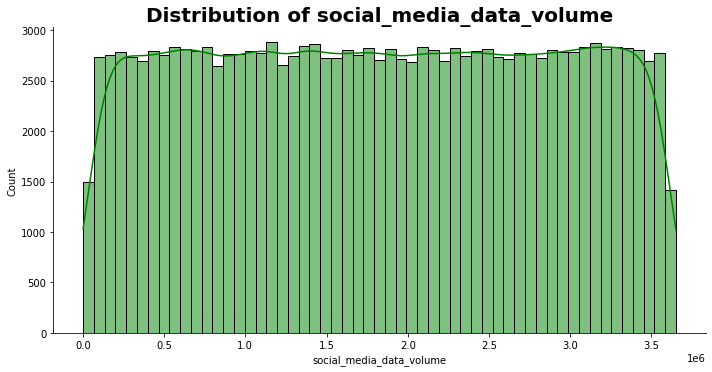

<Figure size 720x360 with 0 Axes>

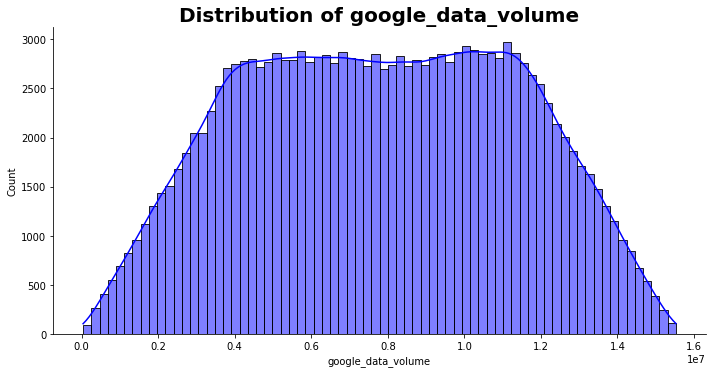

<Figure size 720x360 with 0 Axes>

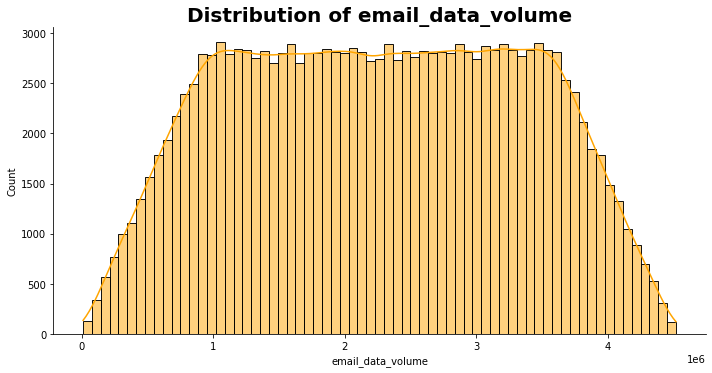

<Figure size 720x360 with 0 Axes>

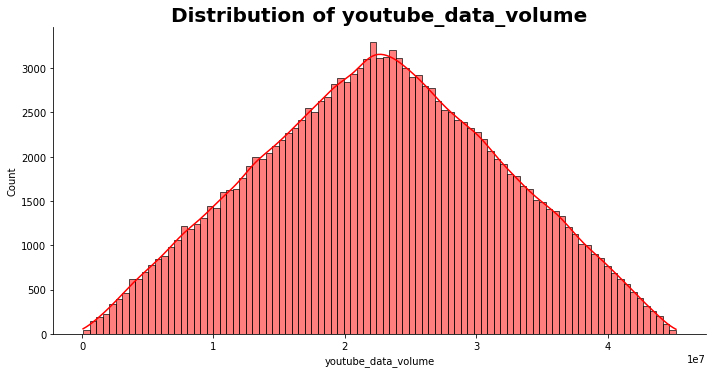

<Figure size 720x360 with 0 Axes>

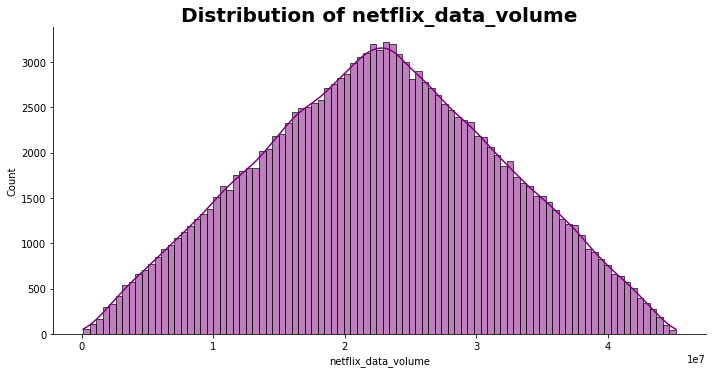

<Figure size 720x360 with 0 Axes>

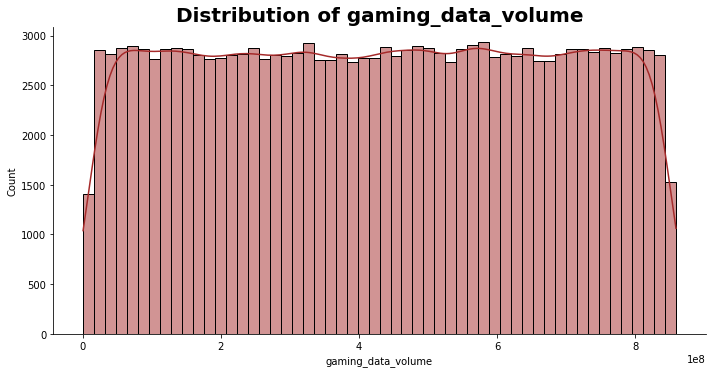

<Figure size 720x360 with 0 Axes>

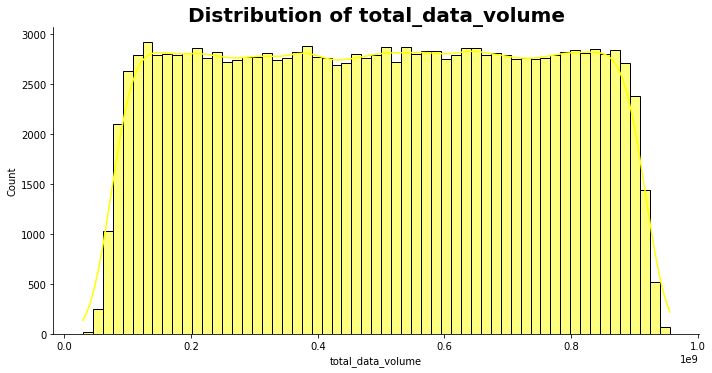

<Figure size 720x360 with 0 Axes>

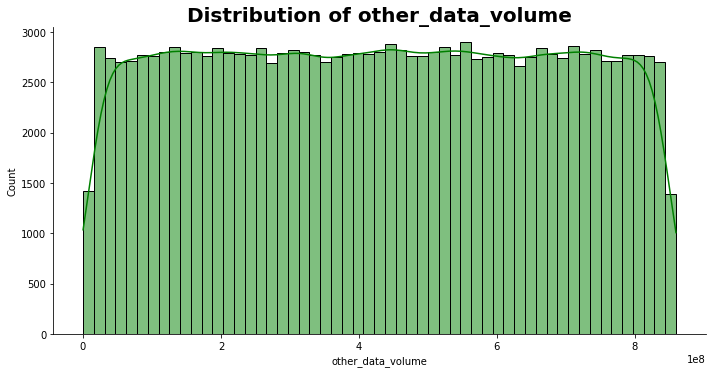

In [23]:
plot_hist(df_copy, "social_media_data_volume", "green")
plot_hist(df_copy, "google_data_volume", "blue")
plot_hist(df_copy, "email_data_volume", "orange")
plot_hist(df_copy, "youtube_data_volume", "red")
plot_hist(df_copy, "netflix_data_volume", "purple")
plot_hist(df_copy, "gaming_data_volume", "brown")
plot_hist(df_copy, "total_data_volume", "yellow")
plot_hist(df_copy, "other_data_volume", "green")

The distribution of data volume graphs show that\
Normal distribution: 
1. Youtube Data Volume: This means most users use Youtube data in the mid range, this shows there is a healthy market for Youtube data
2. Netflix Data Volume: This means most users use Netflix data in the mid range, this shows there is a healthy market for Netflix data
3. Google Data Volume:This means most users use data for google in the mid range, this shows there is a healthy market for that data
4. Email Data Volume:This means most users use data for email in the mid range, this shows there is a healthy market for that data.\

Not Normal distribution: 
5. Social Data Volume
6. Gaming Data Volume 
7. Total Data Volume 
8. Other Data Volume 

<Figure size 720x360 with 0 Axes>

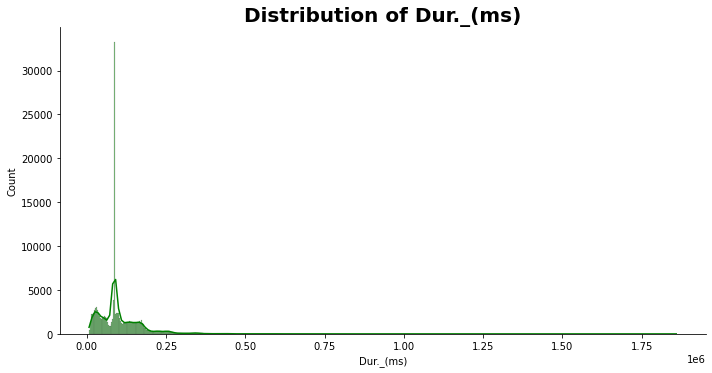

In [24]:
plot_hist(df_copy, "Dur._(ms)", "green")


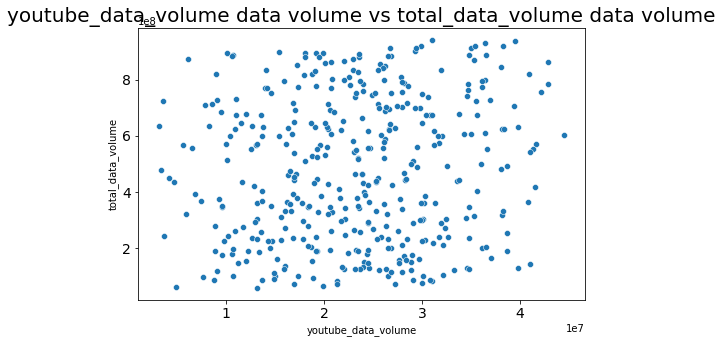

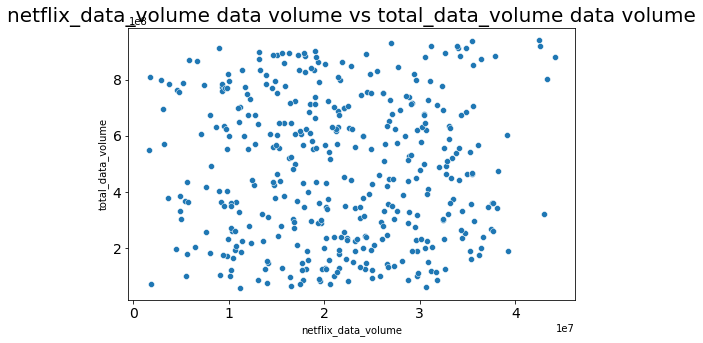

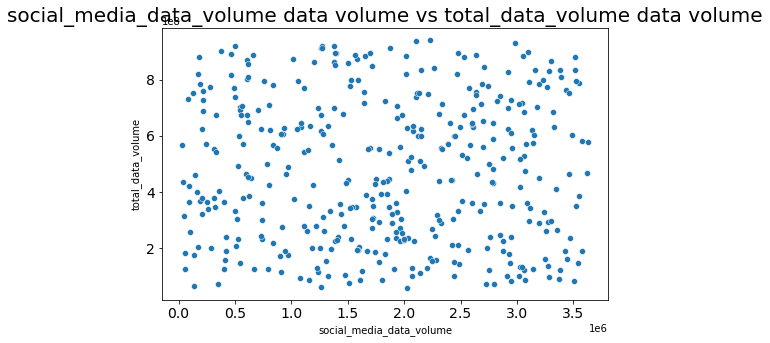

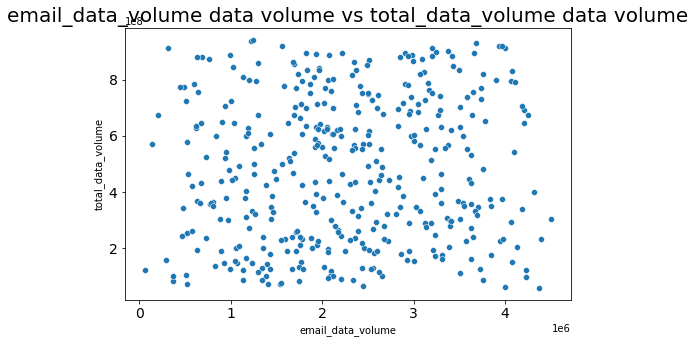

In [44]:
#plot_scatter(df_copy.head(100), x_col="youtube_data_volume", y_col="total_data_volume", hue="Handset_Type",
#             style="Handset_Type")
plot_scatter(df_copy.head(400), x_col="youtube_data_volume", y_col="total_data_volume")
plot_scatter(df_copy.head(400), x_col="netflix_data_volume", y_col="total_data_volume")
plot_scatter(df_copy.head(400), x_col="social_media_data_volume", y_col="total_data_volume")
plot_scatter(df_copy.head(400), x_col="email_data_volume", y_col="total_data_volume")

In all scatterplot, the data points are spread out. This means there is no trend in the data